In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def correlations(intensities):
    x1h = intensities
    x2h = np.zeros([height, width])
    for i in range(0, height):
        for j in range(0, width-1):
            x2h[i][j] = x1h[i][j+1]
        x2h[i][width-1] = x1h[i][width-1]

    total_N = np.size(x1h)
    mean_x1h = x1h.sum()/total_N
    mean_x2h = x2h.sum()/total_N

    aa1 = (x1h - mean_x1h)**2
    bb1 = aa1.sum()
    std_dev1 = np.sqrt(bb1/total_N)

    aa2 = (x2h - mean_x2h)**2
    bb2 = aa2.sum()
    std_dev2 = np.sqrt(bb2/total_N)

    cc = (x1h - mean_x1h)*(x2h - mean_x2h)
    hcov = cc.sum()/total_N

    hcorr = hcov/(std_dev1 * std_dev2)
    print('hcorr', hcorr)

    # Vertical correlation
    x1v = intensities
    x2v = np.zeros([height, width])
    for i in range(0, height-1):
        for j in range(0, width):
            x2v[i][j] = x1v[i+1][j]
            x2v[height-1][j] = x1v[height-1][j]

    total_N = np.size(x1v)
    mean_x1v = x1v.sum()/total_N
    mean_x2v = x2v.sum()/total_N

    aa1 = (x1v - mean_x1v)**2
    bb1 = aa1.sum()
    std_dev1 = np.sqrt(bb1/total_N)

    aa2 = (x2v - mean_x2v)**2
    bb2 = aa2.sum()
    std_dev2 = np.sqrt(bb2/total_N)

    cc = (x1v - mean_x1v)*(x2v - mean_x2v)
    vcov = cc.sum()/total_N

    vcorr = vcov/(std_dev1 * std_dev2)
    print('vcorr',vcorr)

    # Diagonal correlation
    x1d = intensities
    x2d = np.zeros([height, width])
    for i in range(0, height-1):
        for j in range(0, width-1):
            x2d[i][j] = x1d[i+1][j+1]
            x2d[height-1][j] = x1d[height-1][j]
        x2d[i][width-1] = x1d[i][width-1]
    x2d[height-1][width-1] = x1d[height-1][width-1]

    total_N = np.size(x1d)
    mean_x1d = x1d.sum()/total_N
    mean_x2d = x2d.sum()/total_N

    aa1 = (x1d - mean_x1d)**2
    bb1 = aa1.sum()
    std_dev1 = np.sqrt(bb1/total_N)

    aa2 = (x2d - mean_x2d)**2
    bb2 = aa2.sum()
    std_dev2 = np.sqrt(bb2/total_N)

    cc = (x1d - mean_x1d)*(x2d - mean_x2d)
    dcov = cc.sum()/total_N

    dcorr = dcov/(std_dev1 * std_dev2)
    print('dcorr',dcorr)
    
    return hcorr, vcorr, dcorr

In [3]:
def eve_distortion(eve_intensities): #from the reconstructed image in uint8 type
    feve_intensities = eve_intensities.astype(np.float)
    fintensities = intensities.astype(np.float)
    dif = (fintensities -  feve_intensities)
    eve_dist_mat = dif**2
    occurance_sum = height*width #?!
    eve_dist = eve_dist_mat.sum()/occurance_sum
    return eve_dist

# Intensities

In [4]:
pairs1 = np.arange(0,128,1)

th = 4 #threshold
pairing_rounds = np.floor(th/2)
pairs2 = []
for j in range(int(pairing_rounds)):
    n = int((255-128-(2*j+1))/th)
    for i in range(n+1):
        pairs2 = np.append(pairs2,128+2*j+i*th)
        pairs2 = np.append(pairs2,128+2*j+1+i*th)
    if (128+2*j+(n+1)*th) <= 255:
        pairs2 = np.append(pairs2, 128+2*j+(n+1)*th)

if np.mod(th,2):
    n = int((255-128-(th-1))/th)# 128+4+n*th =<255
    for i in range(n+1):
        pairs2 = np.append(pairs2,128+th-1+i*th)     

num_paired = np.size(pairs2)
num_remained = 128 - num_paired

In [8]:
#eve_msb0
img_file = 'lena_gray_512.tif'
intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
imf = np.float32(intensities)
height = np.shape(imf)[0]
width = np.shape(imf)[1]

eve_msb0 = np.zeros([np.shape(imf)[0],np.shape(imf)[1]])
for i in range(np.shape(imf)[0]):
    for j in range(np.shape(imf)[1]):

        if imf[i,j] in pairs1:
            pos = np.argwhere(pairs1 == imf[i,j])

            if np.mod(pos,2):
                eve_msb0_element = pairs2[pos]
            else:
                eve_msb0_element = imf[i,j]

            eve_msb0[i,j] = eve_msb0_element


        if imf[i,j] in pairs2:
            pos = np.argwhere(pairs2 == imf[i,j])

            if np.mod(pos,2):
                eve_msb0_element = imf[i,j]
            else:
                eve_msb0_element = pairs1[pos]

            eve_msb0[i,j] = eve_msb0_element


# imf_uint8 =imf.astype(np.uint8)
# cv2.imshow('original', imf_uint8)
# filename = 'original.webp'
# cv2.imwrite(filename, imf_uint8)
# cv2.waitKey(1000)

eve_msb0_uint8 =eve_msb0.astype(np.uint8)
cv2.imshow('eve_msb0', eve_msb0_uint8)
filename = 'eve_msb0th'+str(th)+'.png'
# cv2.imwrite(os.path.join(os.path.expanduser('~'),'Desktop',filename), eve_msb0_uint8)
cv2.imwrite(filename, eve_msb0_uint8)
cv2.waitKey(1000)

-1

In [10]:
cv2.destroyAllWindows()

In [12]:
pairs1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [13]:
pairs2

array([128., 129., 132., 133., 136., 137., 140., 141., 144., 145., 148.,
       149., 152., 153., 156., 157., 160., 161., 164., 165., 168., 169.,
       172., 173., 176., 177., 180., 181., 184., 185., 188., 189., 192.,
       193., 196., 197., 200., 201., 204., 205., 208., 209., 212., 213.,
       216., 217., 220., 221., 224., 225., 228., 229., 232., 233., 236.,
       237., 240., 241., 244., 245., 248., 249., 252., 253., 130., 131.,
       134., 135., 138., 139., 142., 143., 146., 147., 150., 151., 154.,
       155., 158., 159., 162., 163., 166., 167., 170., 171., 174., 175.,
       178., 179., 182., 183., 186., 187., 190., 191., 194., 195., 198.,
       199., 202., 203., 206., 207., 210., 211., 214., 215., 218., 219.,
       222., 223., 226., 227., 230., 231., 234., 235., 238., 239., 242.,
       243., 246., 247., 250., 251., 254., 255.])

# Intensities_different thresholds

In [8]:
pairs1 = np.arange(0,128,1)
ch_msb0 = []
cv_msb0 = []
cd_msb0 = []

ch_msb1 = []
cv_msb1 = []
cd_msb1 = []

img_file = 'lena_gray_512.tif'
intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
imf = np.float32(intensities)

height = np.shape(imf)[0]
width = np.shape(imf)[1]

for th in range(1,100):
# th = 50 #threshold
    pairing_rounds = np.floor(th/2)
    pairs2 = []
    for j in range(int(pairing_rounds)):
        n = int((255-128-(2*j+1))/th)
        for i in range(n+1):
            pairs2 = np.append(pairs2,128+2*j+i*th)
            pairs2 = np.append(pairs2,128+2*j+1+i*th)
        if (128+2*j+(n+1)*th) <= 255:
            pairs2 = np.append(pairs2, 128+2*j+(n+1)*th)
    
    if np.mod(th,2):
        n = int((255-128-(th-1))/th)# 128+4+n*th =<255
        for i in range(n+1):
            pairs2 = np.append(pairs2,128+th-1+i*th)     

    #eve_msb0
    eve_msb0 = np.zeros([np.shape(imf)[0],np.shape(imf)[1]])
    for i in range(np.shape(imf)[0]):
        for j in range(np.shape(imf)[1]):
        
            if imf[i,j] in pairs1:
                pos = np.argwhere(pairs1 == imf[i,j])
            
                if np.mod(pos,2):
                    eve_msb0_element = pairs2[pos]
                else:
                    eve_msb0_element = imf[i,j]
                
                eve_msb0[i,j] = eve_msb0_element
            
        
            if imf[i,j] in pairs2:
                pos = np.argwhere(pairs2 == imf[i,j])
            
                if np.mod(pos,2):
                    eve_msb0_element = imf[i,j]
                else:
                    eve_msb0_element = pairs1[pos]
                
                eve_msb0[i,j] = eve_msb0_element
            
            
    eve_msb0_uint8 =eve_msb0.astype(np.uint8)
    cv2.imshow('eve_msb0', eve_msb0_uint8)
    filename = 'eve_msb0th'+str(th)+'.png'
    cv2.imwrite(os.path.join(os.path.expanduser('~'),'Desktop',filename), eve_msb0_uint8)
    cv2.imwrite(filename, eve_msb0_uint8)
    cv2.waitKey(1000)


    ch1_msb0 = correlations(eve_msb0_uint8)[0]
    ch_msb0 = np.append(ch_msb0,ch1_msb0)
    
    cv1_msb0 = correlations(eve_msb0_uint8)[1]
    cv_msb0 = np.append(cv_msb0,cv1_msb0)
    
    cd1_msb0 = correlations(eve_msb0_uint8)[2]
    cd_msb0 = np.append(cd_msb0,cd1_msb0)
    
    
    #eve_msb1
    eve_msb1 = np.zeros([np.shape(imf)[0],np.shape(imf)[1]])
    for i in range(np.shape(imf)[0]):
        for j in range(np.shape(imf)[1]):
        
            if imf[i,j] in pairs1:
                pos = np.argwhere(pairs1 == imf[i,j])
            
                if np.mod(pos,2):
                    eve_msb1_element = imf[i,j]
                else:
                    eve_msb1_element = pairs2[pos]
                
                eve_msb1[i,j] = eve_msb1_element
            
        
            if imf[i,j] in pairs2:
                pos = np.argwhere(pairs2 == imf[i,j])
            
                if np.mod(pos,2):
                    eve_msb1_element = pairs1[pos]
                else:
                    eve_msb1_element = imf[i,j]
                
                eve_msb1[i,j] = eve_msb1_element
            
            
    eve_msb1_uint8 =eve_msb1.astype(np.uint8)
    cv2.imshow('eve_msb1', eve_msb1_uint8)
    filename = 'eve_msb1th'+str(th)+'.png'
    cv2.imwrite(os.path.join(os.path.expanduser('~'),'Desktop',filename), eve_msb1_uint8)
    cv2.imwrite(filename, eve_msb1_uint8)
    cv2.waitKey(1000)


    ch1_msb1 = correlations(eve_msb1_uint8)[0]
    ch_msb1 = np.append(ch_msb1,ch1_msb1)
    
    cv1_msb1 = correlations(eve_msb1_uint8)[1]
    cv_msb1 = np.append(cv_msb1,cv1_msb1)
    
    cd1_msb1 = correlations(eve_msb1_uint8)[2]
    cd_msb1 = np.append(cd_msb1,cd1_msb1)

hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298
hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298
hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298
hcorr 0.18069415230024213
vcorr 0.19763072842820412
dcorr 0.16968948537379602
hcorr 0.18069415230024213
vcorr 0.19763072842820412
dcorr 0.16968948537379602
hcorr 0.18069415230024213
vcorr 0.19763072842820412
dcorr 0.16968948537379602
hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298
hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298
hcorr 0.17822587480942698
vcorr 0.1961185157196484
dcorr 0.16964466506243298


KeyboardInterrupt: 

In [ ]:
cv2.destroyAllWindows()

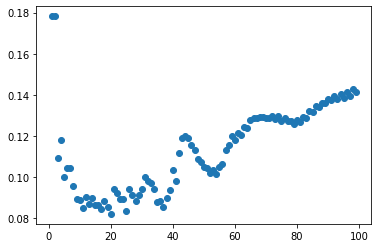

In [314]:
ths = range(1,100)

plt.figure()
plt.plot(ths, ch_msb0,'o')
plt.savefig('horizontal_correlation')

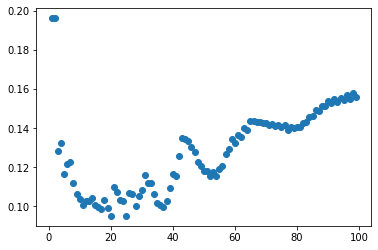

In [315]:
ths = range(1,100)

plt.figure()
plt.plot(ths, cv_msb0,'o')
plt.savefig('vertical_correlation')

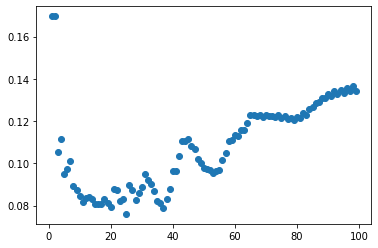

In [316]:
ths = range(1,100)

plt.figure()
plt.plot(ths, cd_msb0,'o')
plt.savefig('diagonal_correlation')

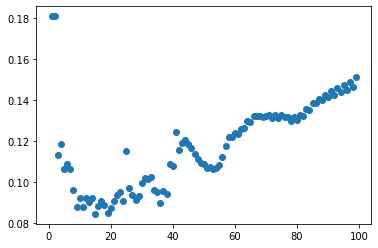

In [35]:
ths = range(1,100)

plt.figure()
plt.plot(ths, ch_msb1,'o')
plt.savefig('horizontal_correlation')

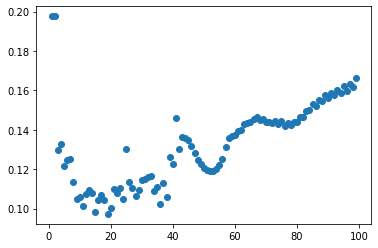

In [36]:
ths = range(1,100)

plt.figure()
plt.plot(ths, cv_msb1,'o')
plt.savefig('vertical_correlation')

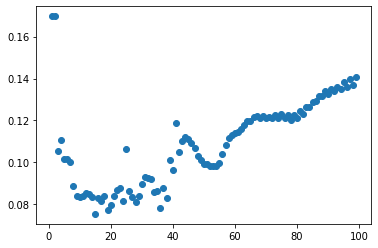

In [37]:
ths = range(1,100)

plt.figure()
plt.plot(ths, cd_msb1,'o')
plt.savefig('diagonal_correlation')

# DCT

In [9]:
all_nq_ac = []
for i in range(0,64):
    for j in range(0,64):
        blk = imf[8*i:8*(i+1), 8*j:8*(j+1)]-128
        dct = cv2.dct(blk)
        nq_coef = np.round(dct)
        nq_coef_ac = np.delete(nq_coef, [0,0])
        
        all_nq_ac = np.append(all_nq_ac, nq_coef_ac)
        
#         fq_coef = np.round(dct/fqtable)
#         fq_coef_ac = np.delete(fq_coef, [0,0])
#         all_fq_ac = np.append(all_fq_ac, fq_coef_ac)

unique, counts = np.unique(all_nq_ac, return_counts=True)

maximum = int(np.max(unique))
minimum = int(np.min(unique))

border=int((maximum+minimum+1)/2) # first value in second half

pairs1 = list(range(minimum,border))
th = 4
pairing_rounds = np.floor(th/2)
pairs2 = []
for j in range(int(pairing_rounds)):
    n = int((maximum-border-(2*j+1))/th)
    for i in range(n+1):
        pairs2 = np.append(pairs2,border+2*j+i*th)
        pairs2 = np.append(pairs2,border+2*j+1+i*th)
    if (border+2*j+(n+1)*th) <= maximum:
        pairs2 = np.append(pairs2, border+2*j+(n+1)*th)
    
if np.mod(th,2):
    n = int((maximum-border-(th-1))/th)# 128+4+n*th =<255
    for i in range(n+1):
        pairs2 = np.append(pairs2,border+th-1+i*th)

In [10]:
#eve
height = 512
width = 512
eve_msb0_intensities = np.zeros([height,width])
eve_msb1_intensities = np.zeros([height,width])

for ii in range(0,64):
    for jj in range(0,64):
        blk = imf[8*ii:8*(ii+1), 8*jj:8*(jj+1)]-128
        dct = cv2.dct(blk)
        nq_coef = np.round(dct)
        nq_coef_ac = np.delete(nq_coef, [0,0])
        nq_coef_dc = nq_coef[0,0]
             
        
        eve_msb0 = np.zeros(63)
        eve_msb1 = np.zeros(63)
        for i in range(63):
            if nq_coef_ac[i] in pairs1:
                pos = np.argwhere(pairs1 == nq_coef_ac[i])

                if np.mod(pos,2):
                    eve_msb0_element = pairs2[pos]
                    eve_msb1_element = nq_coef_ac[i]
                else:
                    eve_msb0_element = nq_coef_ac[i]
                    eve_msb1_element = pairs2[pos]

                eve_msb0[i] = eve_msb0_element
                eve_msb1[i] = eve_msb1_element

                
            if nq_coef_ac[i] in pairs2:
                pos = np.argwhere(pairs2 == nq_coef_ac[i])

                if np.mod(pos,2):
                    eve_msb0_element = nq_coef_ac[i]
                    eve_msb1_element = pairs1[int(pos)]
                else:
                    eve_msb0_element = pairs1[int(pos)]
                    eve_msb1_element = nq_coef_ac[i]

                eve_msb0[i] = eve_msb0_element
                eve_msb1[i] = eve_msb1_element
        
        
        eve_msb0_coef1 = np.insert(eve_msb0, 0, nq_coef_dc)
        eve_msb0_coef = np.reshape(eve_msb0_coef1,[8,8])
        
        eve_msb0_intens1 = cv2.idct(eve_msb0_coef)
        eve_msb0_intens = np.round(eve_msb0_intens1)+128  
        eve_msb0_intensities [8*ii:8*(ii+1), 8*jj:8*(jj+1)]= eve_msb0_intens
        
        eve_msb1_coef1 = np.insert(eve_msb1, 0, nq_coef_dc)
        eve_msb1_coef = np.reshape(eve_msb1_coef1,[8,8])
        
        eve_msb1_intens1 = cv2.idct(eve_msb1_coef)
        eve_msb1_intens = np.round(eve_msb1_intens1)+128 
        eve_msb1_intensities [8*ii:8*(ii+1), 8*jj:8*(jj+1)]= eve_msb1_intens

In [12]:
eve_msb0_uint8 =eve_msb0_intensities.astype(np.uint8)
cv2.imshow('eve_msb0', eve_msb0_uint8)
filename = 'eve_msb0th'+str(th)+'.png'
cv2.imwrite(os.path.join(os.path.expanduser('~'),'Desktop',filename), eve_msb0_uint8)
cv2.imwrite(filename, eve_msb0_uint8)
cv2.waitKey(1000)

eve_msb1_uint8 =eve_msb1_intensities.astype(np.uint8)
cv2.imshow('eve_msb1', eve_msb0_uint8)
filename = 'eve_msb1th'+str(th)+'.png'
cv2.imwrite(os.path.join(os.path.expanduser('~'),'Desktop',filename), eve_msb0_uint8)
cv2.imwrite(filename, eve_msb0_uint8)
cv2.waitKey(1000)

-1

In [14]:
cv2.destroyAllWindows()

In [15]:
eve_msb0_dist_db = 10*np.log10(eve_distortion(eve_msb0_intensities))
eve_msb1_dist_db = 10*np.log10(eve_distortion(eve_msb1_intensities))
print(eve_msb0_dist_db)
print(eve_msb1_dist_db)

50.280155143540426
50.241842887354835
